In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
x = np.linspace(-5, 5, num = 1000)
speed = np.random.uniform(0, 10, 100)
distance = np.random.randint(0, 500)

In [ ]:
def Kalman_filter(mu_t_1, unc_t_1, speed_t, distance_t):
  mu_t_dash = A * mu_t_1 + B * speed_t
  unc_t_dash = A * unc_t_1 * A + R

  Kt = unc_t_dash *

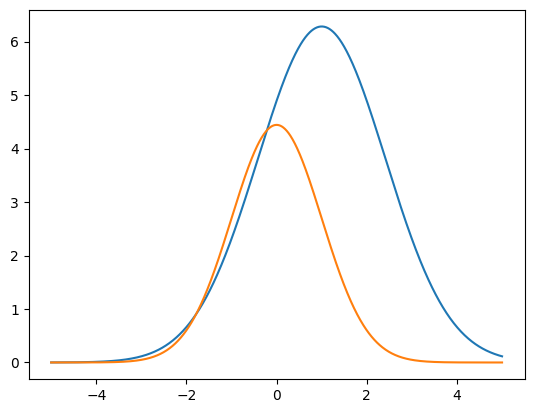

In [24]:
sigma1 = np.sqrt(0.5)
sigma2 = np.sqrt(1)
mu1 = 1
mu2 = 0
fun1 = ((x - mu1) ** 2 ) / 2 * sigma1 ** 2
fun2 = ((x - mu2) ** 2 ) / 2 * sigma2 ** 2
y1 = np.exp(-fun1) / sigma1 * np.sqrt(2) * np.pi
y2 = np.exp(-fun2) / sigma2 * np.sqrt(2) * np.pi
plt.plot(x ,y1)
plt.plot(x, y2)
plt.show()

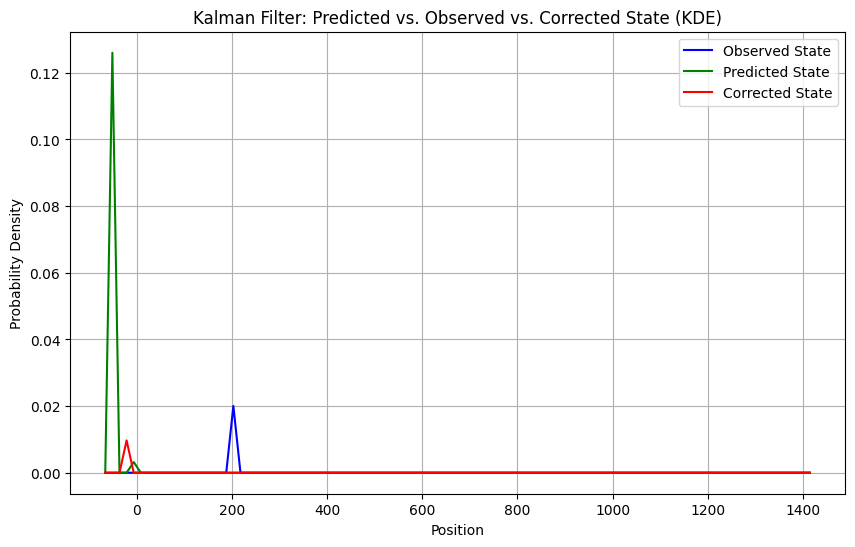

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

dt = 0.25
process_variance = 1e-3
measurement_variance = 1e3

x = np.array([[0], [0]]) #represents position and velocity
P = np.eye(2) * 100

C = np.array([[1., dt], [0., 1.]])
H = np.array([[1., 0.]])
Q = np.array([[process_variance, 0], [0, process_variance]])
R = np.array([[measurement_variance]])

num_steps = 100
speeds = np.random.normal(loc=1, scale=0.5, size=num_steps)

z_list = []
x_pred_list = []
x_corr_list = []

for speed in speeds:
    x = np.dot(C, x) + np.dot(np.array([[0], [1]]), speed)
    P = np.dot(C, np.dot(P, C.T)) + Q

    z = x[0, 0] + np.random.normal(loc=0, scale=np.sqrt(measurement_variance))

    y = z - np.dot(H, x)
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
    x += np.dot(K, y)
    P = P - np.dot(K, np.dot(H, P))

    z_list.append(z)
    x_pred_list.append(x[0, 0])
    x_corr_list.append(x[1, 0])

plt.figure(figsize=(10, 6))

#kde_observed = gaussian_kde(z_list)
#kde_predicted = gaussian_kde(x_pred_list)
#kde_corrected = gaussian_kde(x_corr_list)
observed = []
predicted = []
corrected = []
for l in z_list:
  observed.append(np.exp(- l * l / 0.2) / 2 * np.sqrt(0.1) * np.pi)

for m in x_pred_list:
  predicted.append(np.exp(- m * m / 0.2) / 2 * np.sqrt(0.1) * np.pi)

for n in x_corr_list:
  corrected.append(np.exp(- n * n / 0.2) / 2 * np.sqrt(0.1) * np.pi)

x_values = np.linspace(min(z_list), max(z_list), num_steps)

plt.plot(x_values, observed, label='Observed State', color='blue')
plt.plot(x_values, predicted, label='Predicted State', color='green')
plt.plot(x_values, corrected, label='Corrected State', color='red')

plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Kalman Filter: Predicted vs. Observed vs. Corrected State (KDE)')
plt.legend()
plt.grid(True)
plt.show()